<a href="https://colab.research.google.com/github/szykry/CVML_HW/blob/feature%2FOrsi/automata_depth_segment_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework



In [0]:
# Evaluation
from HW.evaluate import evaluate

#file = open('HW/annotations.pickle','rb')
#predictions = pickle.load(file)

evaluate(predictions)

ModuleNotFoundError: ignored

# Tradition



In [1]:
#******************INIT*******************
!pip install -U torch torchvision numpy opencv-python



# Homework dataset
!wget http://deeplearning.iit.bme.hu/CVS/HW.zip
!unzip -qq HW.zip
!rm HW.zip

# Traffic Sign Classification set
!wget http://deeplearning.iit.bme.hu/CVS/trafficSignsHW.zip
!unzip -qq trafficSignsHW.zip
!rm trafficSignsHW.zip


!git clone https://github.com/szykry/CVML_HW.git

# Set root folder
import os
name = "/content/HW/"
os.chdir(name)
!pwd

 #OpenCV
import cv2

#Numpy - numeric library
import numpy as np

#Plotting
import matplotlib.pyplot as plt
%matplotlib inline

#*******************END OF INIT*************

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.5.0+cu101)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.6.0+cu101)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.18.4)
     |████████████████████████████████| 28.2MB 147kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
--2020-05-24 08:53:29--  http://deeplearning.iit.bme.hu/CVS/HW.zip
Resolving deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)... 152.66.243.112
Connecting to deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)|152.66.243.112|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14446460 (14M) [application/zip]
Saving to: ‘HW.zip’

HW.zip              100%[=================

In [0]:
# Get all subfolders in a directory
import os
myFolderList = [f.path for f in os.scandir(path) if f.is_dir()]

NameError: ignored

In [0]:
# Get all files with extension in a directory
import glob
import re
 
def sorted_nicely( l ):
    """ Sort the given iterable in the way that humans expect."""
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
    return sorted(l, key = alphanum_key)
 
names = sorted_nicely(glob.glob1(path, "*.extension"))

NameError: ignored

In [0]:
# Class names
classNames = ['traffic sign', 'vehicle', 'cactus']
subclassNames = [
    ['Bump', 'Bumpy road', 'Bus stop', 'Children', 'Crossing (blue)', 'Crossing (red)', 'Cyclists',
     'Danger (other)', 'Dangerous left turn', 'Dangerous right turn', 'Give way', 'Go ahead', 'Go ahead or left',
     'Go ahead or right', 'Go around either way', 'Go around left', 'Go around right', 'Intersection', 'Limit 100',
     'Limit 120', 'Limit 20', 'Limit 30', 'Limit 50', 'Limit 60', 'Limit 70', 'Limit 80', 'Limit 80 over',
     'Limit over', 'Main road', 'Main road over', 'Multiple dangerous turns', 'Narrow road (left)',
     'Narrow road (right)', 'No entry', 'No entry (both directions)', 'No entry (truck)', 'No stopping', 'No takeover',
     'No takeover (truck)', 'No takeover (truck) end', 'No takeover end', 'No waiting', 'One way road',
     'Parking', 'Road works', 'Roundabout', 'Slippery road', 'Stop', 'Traffic light', 'Train crossing',
     'Train crossing (no barrier)', 'Wild animals', 'X - Priority', 'X - Turn left', 'X - Turn right'],
    ['SUV','truck','plane'],
    ['happy','sad','angry','evil']
]

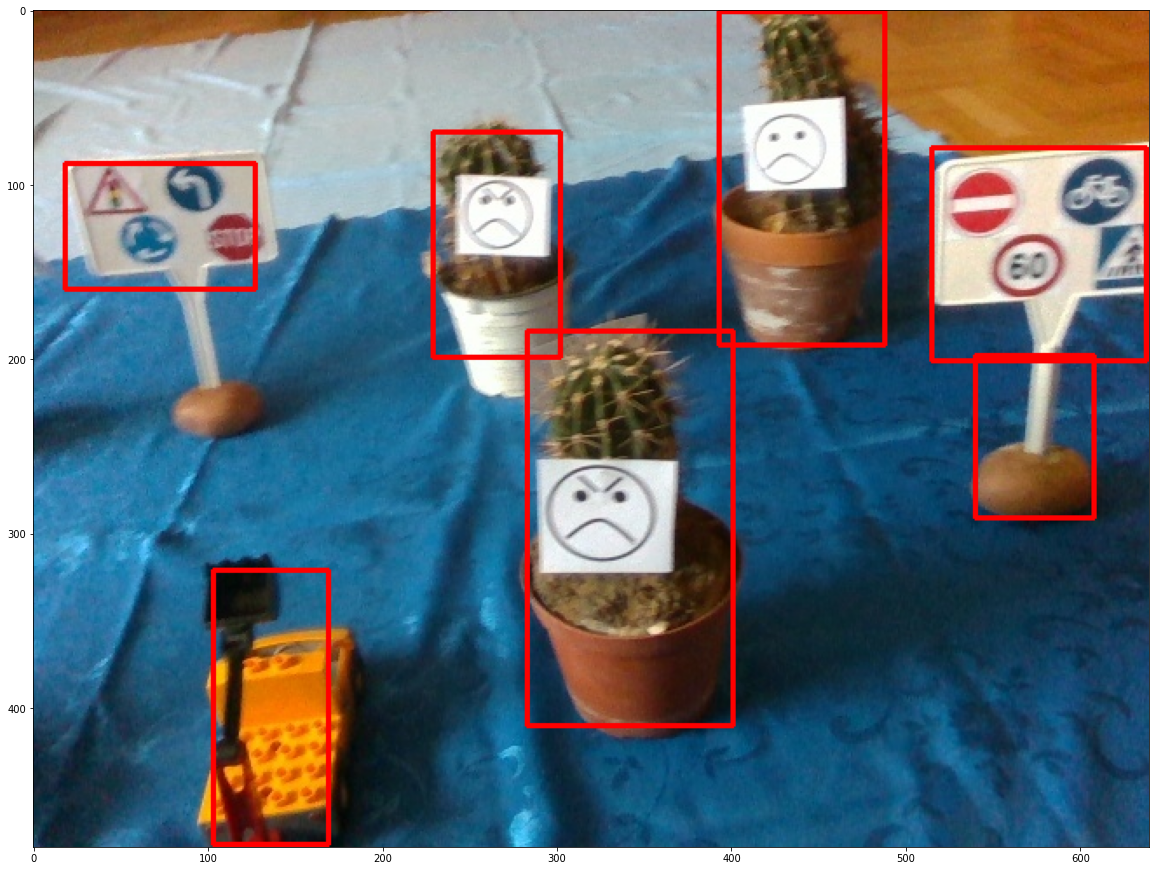

In [2]:
def minMaxLoc(img):
  Xmin = 999;
  Xmax = 0;
  Ymin = 999;
  Ymax = 0;
  
  for i in range(img.shape[0]):
    sor =img[i,:]
    mean=np.count_nonzero(sor)
    if ((Ymin == 999) & (mean > 0)):
      Ymin=i
    if ( mean > 0):
      Ymax = i

  for i in range(img.shape[1]):
    oszlop =img[:,i]
    mean=np.count_nonzero(oszlop)
    if ((Xmin == 999) & (mean > 0)):
      Xmin=i
    if ( mean > 0):
      Xmax = i

  return Xmin,Xmax,Ymin,Ymax

def watershed(edges,img,debug=False):
  kernel = np.ones((3,3),np.uint8)
  #widen edges to make them touch
  edges = cv2.dilate(edges, kernel,iterations=1)

  ret, thresh = cv2.threshold(edges,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
  if debug:
    plt.figure(figsize=(7,7))
    plt.imshow(thresh,cmap='gray')

  sure_fg = cv2.erode(thresh,kernel,iterations=1)
  sure_bg = cv2.dilate(thresh,kernel,iterations=1)

  # Uncertain region(borders)
  unknown = cv2.subtract(sure_bg,sure_fg)

  if debug:
    plt.figure(figsize=(7,7))
    plt.imshow(sure_fg,cmap='gray')

  # Label separate foreground pathes
  ret, markers = cv2.connectedComponents(sure_fg)
      
  # Add one to all labels so that sure background is not 0, but 1
  markers = markers+1
  # Now, mark the region of unknown with zero
  markers[unknown==255] = 0

  if debug:
    plt.figure(figsize=(7,7))
    plt.imshow(markers)
    
  # Runwatershed
  markers = cv2.watershed(img,markers)
  if debug:
    plt.figure(figsize=(15,15))
    plt.subplot(1,2,1)
    plt.imshow(markers)
    plt.subplot(1,2,2)
    plt.imshow(img)

  return markers

def makeBoundingBox(image):
  imagecopy = image.copy()
  imagecopy = cv2.cvtColor(imagecopy,cv2.COLOR_RGB2GRAY)
  imagecopy[imagecopy != 0] = 255;

  xmin,xmax,ymin,ymax = minMaxLoc(imagecopy)

  rect = (xmin,ymin,xmax-xmin,ymax-ymin)

  #rects = objFinder(imagecopy,100,10,10)

  #for i in range(len(rects)):
  #color = (255,255,0)
  #cv2.rectangle(imagecopy, (rect[0],rect[1]), (rect[0]+rect[2],rect[1]+rect[3]), color, 2)


  #plt.figure(figsize=(20,20))
  #plt.imshow(imagecopy,cmap='gray')
  return rect
  #contours,  = cv2.findContours(imgcopy, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


#************************************ MAIN ******************************************************

def depth_segmenter(inputImage, inputDepthImage, debug=False):
  # Read images
  img = inputImage.copy()
  depth = inputDepthImage.copy()

  sor =depth[0,:]
  legelsoAtlag=np.true_divide(sor.sum(),np.count_nonzero(sor))

  #hatsoMaszk=cv2.inRange(depth, legelsoAtlag*0.9, np.amax(depth))
  hatsoMaszk =  np.zeros((480,640)).astype("uint8")
  hatsoMaszk[depth<legelsoAtlag*0.6]=[1]

  if debug:
    plt.figure(figsize=(20,20))
    plt.imshow(hatsoMaszk,cmap='gray')

  # convert to RGB
  img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

  lower_range = np.array([90,0,0])
  upper_range = np.array([120,255,220])

  maszk=cv2.inRange(img_hsv, lower_range, upper_range)

  maszkNegative = cv2.bitwise_not(maszk)
  
  if debug:
    out = cv2.bitwise_and(img_hsv,img_hsv,mask = maszkNegative)
    plotolni = cv2.cvtColor(out, cv2.COLOR_HSV2RGB)
    plt.figure(figsize=(20,20))
    plt.imshow(plotolni,cmap='gray')

  hue_channel = img_hsv[:,:,0]
  avg_hue = np.average(hue_channel)
  asdasd, hue_channel_segment = cv2.threshold(hue_channel,avg_hue,255,cv2.THRESH_BINARY)
  kernel = np.ones((5,5),np.uint8)
  maszkDilation = cv2.erode(hue_channel_segment,kernel,iterations = 2)

  maszkDilation = cv2.bitwise_not(maszkDilation)
  maszkNegative = cv2.bitwise_and(maszkDilation,maszkDilation,mask = maszkNegative)
  maszkNegative = cv2.bitwise_and(maszkNegative,maszkNegative,mask = hatsoMaszk)
  
  if debug:
    plt.figure(figsize=(20,20))
    plt.imshow(maszkNegative,cmap='gray')

  # calculate foreground
  for i in range(depth.shape[0]):
    sor =depth[i,:]
    mean=np.true_divide(sor.sum(),np.count_nonzero(sor))
    sor[sor>mean-20]=0

  # for some reason doesn't work without this
 # depth2[depth==0]=0
 # img_rgb = np.where(depth2 != 0, img_rgb, [0,0,0])

  # Figure with subplots
  if debug:
    plt.figure(figsize=(30,30))
    plt.subplot(1,2,1)
    plt.imshow(img_rgb) 
    plt.subplot(1,2,2)
    plt.imshow(depth,cmap='gray')

  # convert to uint8 from uint16
  cv2.normalize(depth, depth, 0, 255, cv2.NORM_MINMAX)
  depth=depth.astype('uint8')
  depth_8 = cv2.cvtColor(depth, cv2.COLOR_GRAY2BGR)

  if debug:
    plt.figure(figsize=(30,30))
    plt.subplot(1,2,1)
    plt.imshow(depth_8) 

  kernel = np.ones((3,3),np.uint8)
  depth_8 = cv2.morphologyEx(depth_8, cv2.MORPH_OPEN,  kernel, iterations = 3)
  depth_8 = cv2.morphologyEx(depth_8, cv2.MORPH_CLOSE, kernel, iterations = 3)

  Atlag=np.true_divide(sor.sum(),np.count_nonzero(sor))
  depth_8[depth_8 > Atlag*2.2]=[0]

  depth_out = depth_8

  depth_8 = cv2.bitwise_and(depth_8,depth_8,mask = maszkNegative)
  depth_8 = cv2.morphologyEx(depth_8, cv2.MORPH_CLOSE, kernel, iterations = 3)

  if debug: 
    plt.subplot(1,2,2)
    plt.imshow(depth_8,cmap='gray')

  # get edges
  edges = cv2.Canny(depth_8,50,120)
  markers = watershed(edges,img,debug=debug)

  ####
  img2=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  boundingRects=[]
  for i in np.unique(markers):
    if i<2 :
      continue

    imgcopy=img.copy()
    imgcopy[markers!=i]=[0,0,0]  
    xmin,xmax,ymin,ymax = minMaxLoc(imgcopy)

    if ((xmax-xmin > 500) & (ymax-ymin > 350)):
      continue
    
    imgcopy = cv2.bitwise_and(imgcopy,imgcopy,mask = maszkNegative)

    if np.count_nonzero(imgcopy)<3600:
      continue

    #if np.var(np.nonzero(cv2.cvtColor(imgcopy,cv2.COLOR_RGB2HSV)[:,:,0]))<4200:
    #  continue
    if debug:
      plt.figure(figsize=(10,10))
      plt.imshow(imgcopy)
      print(str(i)+":"+str(np.var(np.nonzero(cv2.cvtColor(imgcopy,cv2.COLOR_RGB2HSV)[:,:,0])))+"........\t"+str(np.count_nonzero(imgcopy))+"minmax:"+str(xmin)+" "+str(xmax)+" "+str(ymin)+" "+str(ymax))
  
    boundingRects.append(makeBoundingBox(imgcopy))

  for i in range(len(boundingRects)):
    color = (255,0,0)
    start = (int(boundingRects[i][0]),int(boundingRects[i][1]))
    end = (int(boundingRects[i][0]+boundingRects[i][2]) , int(boundingRects[i][1]+boundingRects[i][3]))
    img2 = cv2.rectangle(img2, start, end, (255,0,0), 2)

  return img2, boundingRects,depth_out

imgBe = cv2.imread("../HW/g3/rgb/250.jpg")
depthBe = cv2.imread("../HW/g3/depth/250.png", -1)
ret, _, _ = depth_segmenter(imgBe, depthBe, debug=False)
#print(depthBe)
plt.figure(figsize=(20,20))
plt.imshow(ret,cmap='gray')

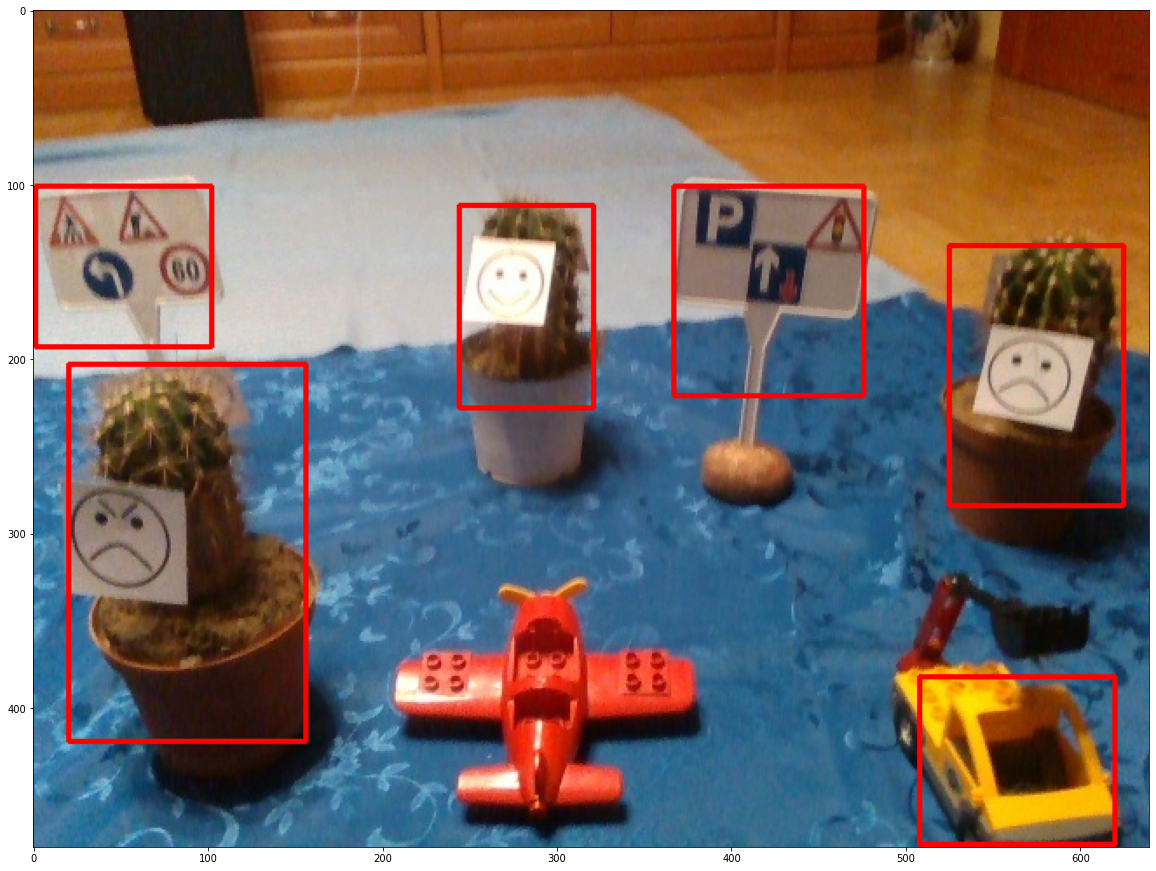

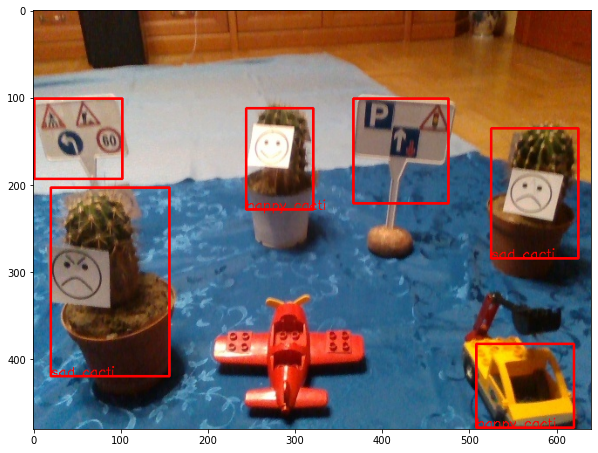

In [0]:
import imutils

#params:
#   - image: the image to use
#   - isRGB: shows if the input is RGB
#   - parameterIndex: the index of the value in the imageStruct (in case of isRGB == True -> 0:R 1:G 2:B)
#   - fromValue: the start value of the measurement
#   - stepValue: the value of one step
#   - steps: determine the number of the steps
#   - offset: set an offset, it works like a preMasking (ex. ((0,0,0),(255,255,120))) (has no affect on the value you want to measure)

def findMax(matches):
  maximum = matches[0]
  i = 0
  index = 0
  for i in range(len(matches)):
    if(matches[i][0] >= maximum[0]):
      maximum = matches[i]
      index = i
  
  return index

def findMaxBoundingRects(boundingRects):
  maxX = boundingRects[0][2]
  maxY = boundingRects[0][3]
  i = 0
  index = 0
  for i in range(len(boundingRects)):
    if(boundingRects[i][2] > maxX or boundingRects[i][3] > maxY):
      maxX = boundingRects[i][2]
      maxY = boundingRects[i][3]
  
  return (maxX,maxY)

def createTemplate(filePath):
  tH = 67
  tW = 77
  template = cv2.imread(filePath)
  template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
  tH2 = template.shape[0]
  tW2 = template.shape[1]
  yratio = tH / tH2
  xratio = tW / tW2
  final = max(yratio, xratio)
  template = cv2.resize(template, (int(tW2*final), int(tH2*final)))
  template = cv2.Canny(template, 50, 250)
  
  return template

def filterOutCacti(objects, masks, boundingRects):
  cacti = []
  objectplaces = []
  avgSs = []
  for i in range(len(objects)):
    #objects[i] = cv2.cvtColor(objects[i], cv2.COLOR_RGB2HSV)
    maszk = cv2.cvtColor(masks[i],cv2.COLOR_BGR2GRAY)
    valamiH = cv2.cvtColor(objects[i],cv2.COLOR_BGR2HSV)[:,:,0]
    valamiH = cv2.bitwise_and(valamiH,valamiH,mask = maszk)
    valamiS = cv2.cvtColor(objects[i],cv2.COLOR_BGR2HSV)[:,:,1]
    valamiS = cv2.bitwise_and(valamiS,valamiS,mask = maszk)
    #plt.figure(figsize=(10,10))
    #plt.subplot(1,2,1)
    #plt.imshow(valamiH)
    #plt.subplot(1,2,2)
    #plt.imshow(valamiS)
    avgSs.append(np.average(valamiS))
    avgH = np.average(valamiH)
  maxS = max(avgSs)
  for i in range(len(objects)):
    if maxS/avgSs[i] <= 3:
      cacti.append(objects[i])
      xlength = boundingRects[i][1]+boundingRects[i][3]
      ystart = boundingRects[i][0]
      objectplaces.append((ystart, xlength))

  return cacti, objectplaces
  

imgBe = cv2.imread("../HW/g2/rgb/185.jpg")
depthBe = cv2.imread("../HW/g2/depth/185.png", -1)
ret, boundingRects, depth_out = depth_segmenter(imgBe, depthBe, debug=False)
plt.figure(figsize=(20,20))
plt.imshow(ret,cmap='gray')

def getCactiSubClass(ret, boundingRects, depth_out):
  #get the copped objects
  objects = []
  masks = []
  for i in range(len(boundingRects)):
      color = (255,0,0)
      start = (int(boundingRects[i][0]),int(boundingRects[i][1])) #startX, startY
      end = (int(boundingRects[i][0]+boundingRects[i][2]) , int(boundingRects[i][1]+boundingRects[i][3])) #endX, endY
      img2 = imgBe[int(boundingRects[i][1]):int(boundingRects[i][1]+boundingRects[i][3]), int(boundingRects[i][0]):int(boundingRects[i][0]+boundingRects[i][2])]
      imgMask = depth_out[int(boundingRects[i][1]):int(boundingRects[i][1]+boundingRects[i][3]), int(boundingRects[i][0]):int(boundingRects[i][0]+boundingRects[i][2])]
      objects.append(img2)
      masks.append(imgMask)
  maxX, maxY = findMaxBoundingRects(boundingRects)
  #resize objects to same size
  for i in range(len(objects)):
    y = objects[i].shape[0]
    x = objects[i].shape[1]
    yratio = maxY / y
    xratio = maxX / x
    final = max(yratio, xratio)
    objects[i] = cv2.resize(objects[i], (int(x*final), int(y*final)))
    masks[i] = cv2.resize(masks[i], (int(x*final), int(y*final)))

  #create templates
  template = createTemplate('/content/CVML_HW/happyface.png')
  templates.append(template)
  template = createTemplate('/content/CVML_HW/sadface.png')
  templates.append(template)
  template = createTemplate('/content/CVML_HW/angryface.png')
  templates.append(template)
  template = createTemplate('/content/CVML_HW/evilface.png')
  templates.append(template)

  objects, objectplaces = filterOutCacti(objects, masks, boundingRects)

  i = -1
  for obj in objects:
    i += 1
    matches = []
    if obj.shape[0] < tH or  obj.shape[1] < tW:
      continue
    obj = cv2.bilateralFilter(obj, 150, 50, 50)
    gray = cv2.cvtColor(obj, cv2.COLOR_BGR2HSV) 
    v = np.median(gray)
    sigma = 0.33
    lower_tresh = int(max(0, (1.0-sigma)*v))
    upper_tresh = int(min(255, (1.0+sigma)*v))
    edged = cv2.Canny(gray, lower_tresh, upper_tresh)
    result = cv2.matchTemplate(edged, templates[0], cv2.TM_CCOEFF_NORMED)
    r = 1 
    (_, maxVal0, _, maxLoc0) = cv2.minMaxLoc(result)
    match = (maxVal0, maxLoc0, r, 0)
    matches.append(match)
    #plt.figure(figsize=(10,10))
    #plt.imshow(obj)
    #print(i)
    #print("happy")
    #print(maxVal0)
    result = cv2.matchTemplate(edged, templates[1], cv2.TM_CCOEFF_NORMED)
    (_, maxVal1, _, maxLoc1) = cv2.minMaxLoc(result)
    match = (maxVal1, maxLoc1, r, 1)
    matches.append(match)
    #print("sad")
    #print(maxVal1)
    result = cv2.matchTemplate(edged, templates[2], cv2.TM_CCOEFF_NORMED)
    (_, maxVal2, _, maxLoc2) = cv2.minMaxLoc(result)
    match = (maxVal2, maxLoc2, r, 2)
    matches.append(match)
    #print("angry")
    #print(maxVal2)
    result = cv2.matchTemplate(edged, templates[3], cv2.TM_CCOEFF_NORMED)
    (_, maxVal3, _, maxLoc3) = cv2.minMaxLoc(result)
    match = (maxVal3, maxLoc3, r, 3)
    matches.append(match)
    #print("evil")
    #print(maxVal3)
      
    if matches == []:
      continue
    index = findMax(matches)
    #if(matches[index][0] <= 0.15):
    #  continue
    #print(i)
    #print(matches[index][0])
    (_, maxLoc, r, ind) = matches[index]
    text = "default text"
    if(ind == 0):
      text = "happy cacti"
    if(ind == 1):
      text = "sad cacti"
    if(ind == 2):
      text = "angry cacti"
    if(ind == 3):
      text = "evil cacti"
    #plt.figure(figsize=(10,10))
    #plt.imshow(templates[ind])
    xlength = objectplaces[1]
    ystart = objectplaces[0]
    #print(xstart,xlength, ystart, ylength)
    ret = cv2.putText(ret, text, (objectplaces[i]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1, cv2.LINE_4)

  return ret

finalImg = getCactiSubClass(ret, boundingRects, depth_out)
plt.figure(figsize=(10,10))
plt.imshow(finalImg)

In [0]:
for obj in objects:
  obj = cv2.bilateralFilter(obj, 150, 50, 50)
  gray = cv2.cvtColor(obj, cv2.COLOR_BGR2HSV)
  plt.figure(figsize=(10,10))
  plt.imshow(gray)
  v = np.median(gray)
  sigma = 0.33
  lower_tresh = int(max(0, (1.0-sigma)*v))
  upper_tresh = int(min(255, (1.0+sigma)*v))
  edged = cv2.Canny(gray, lower_tresh, upper_tresh)
  plt.figure(figsize=(10,10))
  plt.imshow(edged)

17.11429520237537 47.60468432567588 134.136486169714
27.133172713529856 46.64857331821617 83.41921768707483
31.698556073556073 76.10492747992748 126.79182854182854
11.907953960905349 108.72318672839506 78.84918338477367
12.701899509803921 99.07495915032679 65.85072848583879
15.907278806584362 158.21525940623164 116.92056143445032


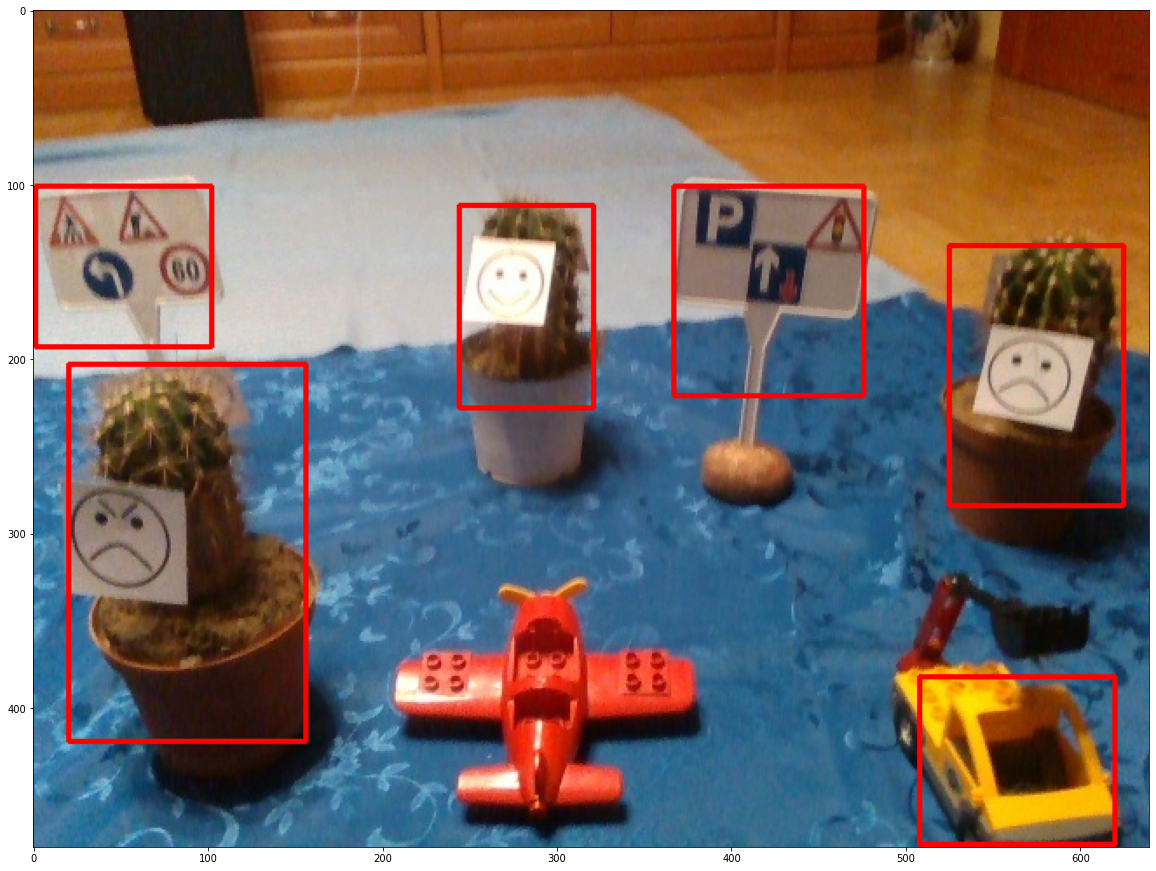

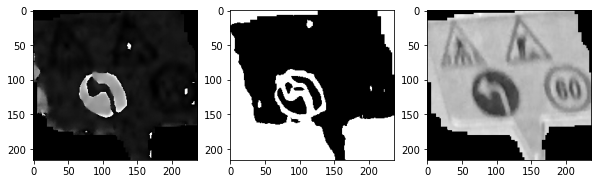

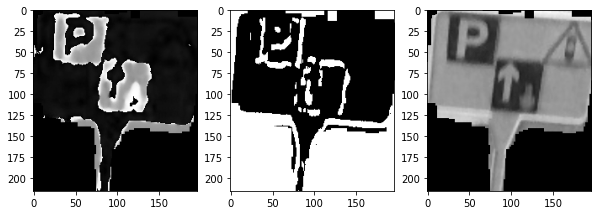

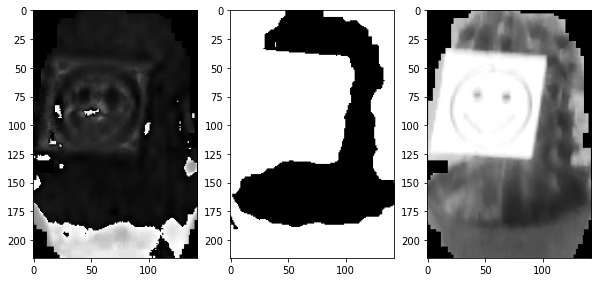

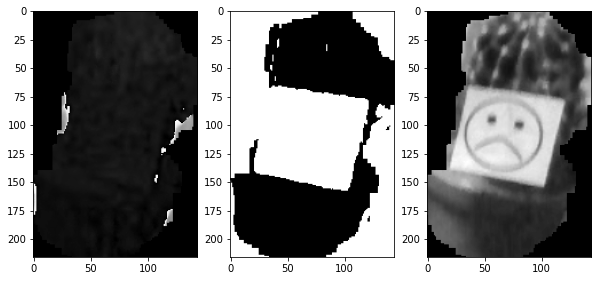

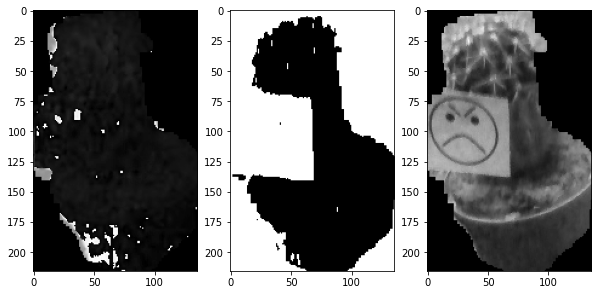

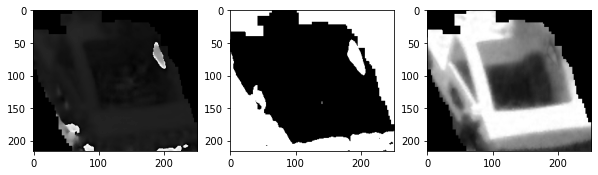

In [29]:
from PIL import Image

def getdominantColour(img):
  average = img.mean(axis=0).mean(axis=0)
  pixels = np.float32(img.reshape(-1, 3))
  n_colors = 5
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
  flags = cv2.KMEANS_RANDOM_CENTERS
  _, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
  _, counts = np.unique(labels, return_counts=True)
  dominant = palette[np.argmax(counts)]

def most_frequent_colour(image):
  w,h = image.size
  pixels = image.getcolors(w*h)
  most_frequent_pixel = pixels[0]
  for count, colour in pixels:
      if count > most_frequent_pixel[0]:
          most_frequent_pixel = (count, colour)
  return most_frequent_pixel

def showSpektrumMask(image, isRGB, parameterIndex, fromValue, stepValue, steps, offset = ((0,0,0),(255,255,255))):
    lower_range = offset[0]
    upper_range = offset[1]
    for i in range(0,steps):

      tempList = list(lower_range)
      tempList[parameterIndex] = i * stepValue
      lower_range = tuple(tempList)

      tempList = list(upper_range)
      tempList[parameterIndex] = (i+1)*stepValue
      upper_range = tuple(tempList)

      maszk=cv2.inRange(image, lower_range, upper_range)
      out = cv2.bitwise_and(image,image,mask = maszk)

      if(isRGB==False):
        out = cv2.cvtColor(out, cv2.COLOR_HSV2RGB)
      plt.figure(figsize=(10,10))
      plt.subplot(1,2,1)
      plt.imshow(out,cmap='gray')
      plt.subplot(1,2,2)
      felirat = out.copy()
      felirat = cv2.cvtColor(felirat, cv2.COLOR_HSV2BGR)
      felirat = cv2.cvtColor(felirat, cv2.COLOR_BGR2GRAY)
      felirat = cv2.bitwise_xor(felirat,felirat,mask = felirat)
      felirat = cv2.cvtColor(felirat, cv2.COLOR_GRAY2BGR)
      low=str(lower_range)
      cv2.putText(felirat,str(lower_range),(10,100),cv2.FONT_HERSHEY_COMPLEX_SMALL,3.75,(255,255,255))
      cv2.putText(felirat,str(upper_range),(10,300),cv2.FONT_HERSHEY_COMPLEX_SMALL,3.75,(255,255,255))
      plt.imshow(felirat,cmap='gray')
      img_pil = Image.fromarray(out)
      freqpixel = most_frequent_colour(img_pil)
      #print(freqpixel)

imgBe = cv2.imread("../HW/g2/rgb/185.jpg")
depthBe = cv2.imread("../HW/g2/depth/185.png", -1)
ret, boundingRects, depth_out = depth_segmenter(imgBe, depthBe, debug=False)
plt.figure(figsize=(20,20))
plt.imshow(ret,cmap='gray')

objects = []
masks =  []
for i in range(len(boundingRects)):
  color = (255,0,0)
  start = (int(boundingRects[i][0]),int(boundingRects[i][1])) #startX, startY
  end = (int(boundingRects[i][0]+boundingRects[i][2]) , int(boundingRects[i][1]+boundingRects[i][3])) #endX, endY
  img2 = imgBe[int(boundingRects[i][1]):int(boundingRects[i][1]+boundingRects[i][3]), int(boundingRects[i][0]):int(boundingRects[i][0]+boundingRects[i][2])]
  imgmask = depth_out[int(boundingRects[i][1]):int(boundingRects[i][1]+boundingRects[i][3]), int(boundingRects[i][0]):int(boundingRects[i][0]+boundingRects[i][2])]
  objects.append(img2)
  masks.append(imgmask)

maxX, maxY = findMaxBoundingRects(boundingRects)
#resize objects to same size
for i in range(len(objects)):
  y = objects[i].shape[0]
  x = objects[i].shape[1]
  yratio = maxY / y
  xratio = maxX / x
  final = max(yratio, xratio)
  objects[i] = cv2.resize(objects[i], (int(x*final), int(y*final)))
  masks[i] = cv2.resize(masks[i], (int(x*final), int(y*final)))

for i in range(len(objects)):
  #objects[i] = cv2.cvtColor(objects[i], cv2.COLOR_RGB2HSV)
  maszk = cv2.cvtColor(masks[i],cv2.COLOR_BGR2GRAY)
  valamiH = cv2.cvtColor(objects[i],cv2.COLOR_BGR2HSV)[:,:,0]
  valamiH = cv2.bitwise_and(valamiH,valamiH,mask = maszk)
  valamiS = cv2.cvtColor(objects[i],cv2.COLOR_BGR2HSV)[:,:,1]
  valamiS = cv2.bitwise_and(valamiS,valamiS,mask = maszk)
  valamiV = cv2.cvtColor(objects[i],cv2.COLOR_BGR2HSV)[:,:,2]
  valamiV = cv2.bitwise_and(valamiV,valamiV,mask = maszk)
  ret, thresh = cv2.threshold(valamiS,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
  thresh = cv2.dilate(thresh, (3,3), thresh, iterations = 3 )
  plt.figure(figsize=(10,10))
  plt.subplot(1,3,1)
  plt.imshow(valamiH, cmap = 'gray')
  plt.subplot(1,3,2)
  plt.imshow(thresh, cmap = 'gray')
  plt.subplot(1,3,3)
  plt.imshow(valamiV, cmap = 'gray')
  print(np.average(valamiH), np.average(valamiS), np.average(valamiV))
  #plt.imshow(objects[i][:,:,0])
  #plt.imshow(objects[i][:,:,1])
  #showSpektrumMask(objects[i], False, 2, 0, 10, 23)
  

In [0]:
import glob
i=0
for file in glob.glob("../HW/g2/rgb/*.*"):
  i=i+1
  imgBGR = cv2.imread(file)
  asd = file.split("/rgb/")
  asd.append(asd[1].split(".jpg"))

  depfile = cv2.imread(asd[0]+"/depth/"+asd[2][0]+".png",-1)
  retRGB, bounding, depth_out = depth_segmenter(imgBGR,depfile,False)
  final = getCactiSubClass(retRGB, bounding, depth_out)
  plt.figure(figsize=(10,10))
  plt.imshow(final,cmap='gray')
  cv2.imwrite(("../HW/out/g4/"+str(i)+".jpg"),cv2.cvtColor(retRGB, cv2.COLOR_RGB2BGR))

In [0]:
def getCactiSubClass3(ret, boundingRects, depth_out):
  #get the copped objects
  objects = []
  masks = []
  templates = []
  for i in range(len(boundingRects)):
    start = (int(boundingRects[i][0]),int(boundingRects[i][1])) #startX, startY
    end = (int(boundingRects[i][0]+boundingRects[i][2]) , int(boundingRects[i][1]+boundingRects[i][3])) #endX, endY
    img2 = ret[int(boundingRects[i][1]):int(boundingRects[i][1]+boundingRects[i][3]), int(boundingRects[i][0]):int(boundingRects[i][0]+boundingRects[i][2])]
    imgMask = depth_out[int(boundingRects[i][1]):int(boundingRects[i][1]+boundingRects[i][3]), int(boundingRects[i][0]):int(boundingRects[i][0]+boundingRects[i][2])]
    objects.append(img2)
    masks.append(imgMask)
  maxX, maxY = findMaxBoundingRects(boundingRects)
  #resize objects to same size
  for i in range(len(objects)):
    y = objects[i].shape[0]
    x = objects[i].shape[1]
    yratio = maxY / y
    xratio = maxX / x
    final = max(yratio, xratio)
    objects[i] = cv2.resize(objects[i], (int(x*final), int(y*final)))
    masks[i] = cv2.resize(masks[i], (int(x*final), int(y*final)))

  #create templates
  filePathes = ['/content/CVML_HW/happyface.png','/content/CVML_HW/sadface.png', '/content/CVML_HW/angryface.png', '/content/CVML_HW/evilface.png' ]
  templates = createTemplate(filePathes)
  #templates.append(template)
  #template = createTemplate('/content/CVML_HW/eye.png')
  #templates.append(template)
  #template = createTemplate('/content/CVML_HW/sad.png')
  #templates.append(template)
  #template = createTemplate('/content/CVML_HW/smile.png')
  #templates.append(template)

  #for temp in templates:
  #  plt.figure(figsize=(10,10))
  #  plt.imshow(temp)

  objects, objectplaces = filterOutCacti(objects, masks, boundingRects)

  i = -1
  for obj in objects:
    i += 1
    matches = []
    text = "default text"
    if obj.shape[0] < 67 or  obj.shape[1] < 77:
      continue
    obj = cv2.bilateralFilter(obj, 150, 50, 50)
    gray = cv2.cvtColor(obj, cv2.COLOR_BGR2HSV) 
    v = np.median(gray)
    sigma = 0.33
    lower_tresh = int(max(0, (1.0-sigma)*v))
    upper_tresh = int(min(255, (1.0+sigma)*v))
    edged = cv2.Canny(gray, lower_tresh, upper_tresh)
    #plt.figure(figsize=(10,10))
    #plt.imshow(edged)
    result = cv2.matchTemplate(edged, templates[0], cv2.TM_CCOEFF_NORMED)
    r = 1 
    (_, maxVal0, _, maxLoc0) = cv2.minMaxLoc(result)
    match = (maxVal0, maxLoc0, r, 0)
    matches.append(match)
    #plt.figure(figsize=(10,10))
    #plt.imshow(obj)
    #print(i)
    #print("happy")
    #print(maxVal0)
    result = cv2.matchTemplate(edged, templates[1], cv2.TM_CCOEFF_NORMED)
    (_, maxVal1, _, maxLoc1) = cv2.minMaxLoc(result)
    match = (maxVal1, maxLoc1, r, 1)
    matches.append(match)
    #print("sad")
    #print(maxVal1)
    result = cv2.matchTemplate(edged, templates[2], cv2.TM_CCOEFF_NORMED)
    (_, maxVal2, _, maxLoc2) = cv2.minMaxLoc(result)
    match = (maxVal2, maxLoc2, r, 2)
    matches.append(match)
    #print("angry")
    #print(maxVal2)
    result = cv2.matchTemplate(edged, templates[3], cv2.TM_CCOEFF_NORMED)
    (_, maxVal3, _, maxLoc3) = cv2.minMaxLoc(result)
    match = (maxVal3, maxLoc3, r, 3)
    matches.append(match)
    #print("evil")
    #print(maxVal3)

    index = findMax(matches)
    ind = index
    if(ind == 0):
      text = "happy cacti"
    if(ind == 1):
      text = "sad cacti"
    if(ind == 2):
      text = "angry cacti"
    if(ind == 3):
      text = "evil cacti"
    if matches == []:
      continue
    #if(matches[index][0] <= 0.15):
    #  continue
    #print(i)
    #print(matches[index][0])
    #plt.figure(figsize=(10,10))
    #plt.imshow(templates[ind])
    #print(xstart,xlength, ystart, ylength)
    ret = cv2.putText(ret, text, (objectplaces[i]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1, cv2.LINE_4)

  return ret

imgBe = cv2.imread("../HW/g2/rgb/147.jpg")
depthBe = cv2.imread("../HW/g2/depth/147.png", -1)
ret, boundingRects, depth_out = depth_segmenter(imgBe, depthBe, debug=False)
plt.figure(figsize=(20,20))
plt.imshow(ret,cmap='gray')
finalImg = getCactiSubClass3(ret, boundingRects, depth_out)
plt.figure(figsize=(10,10))
plt.imshow(finalImg)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:171: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:172: RuntimeWarning: invalid value encountered in greater


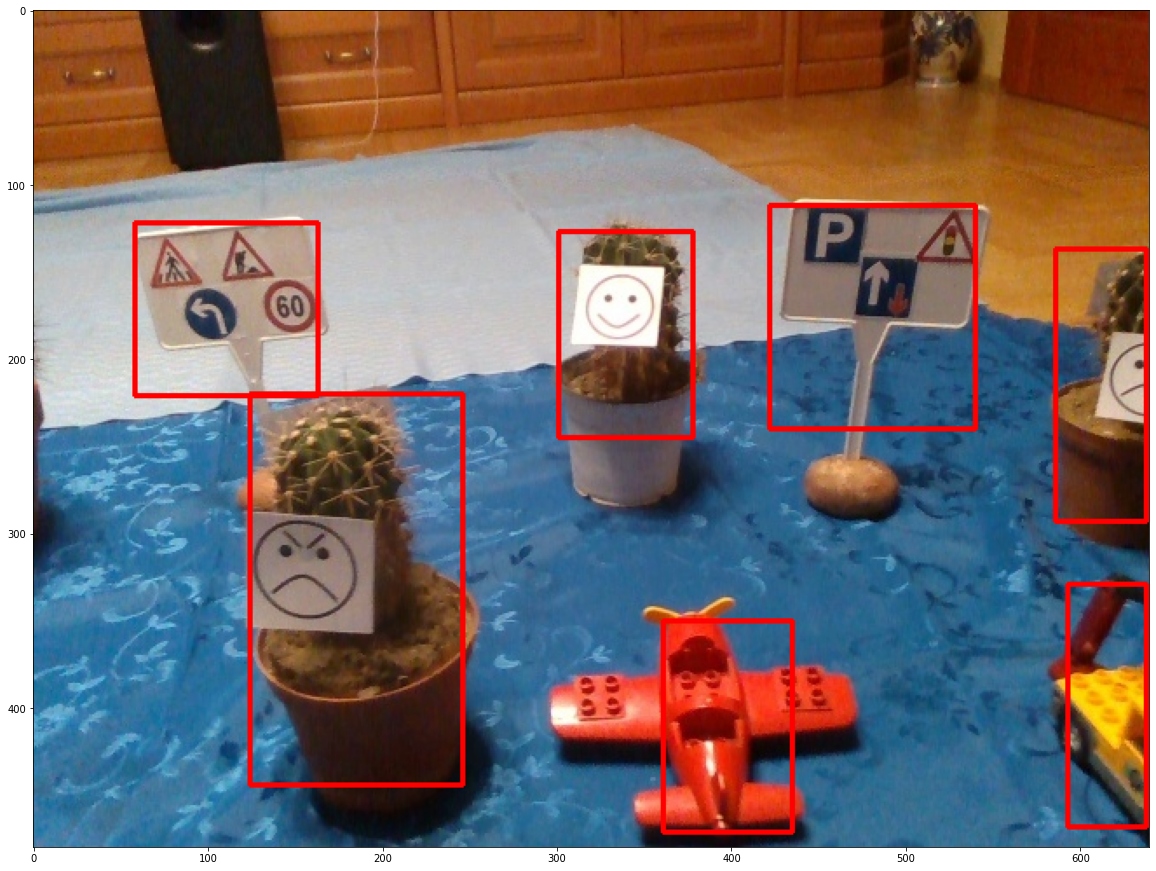

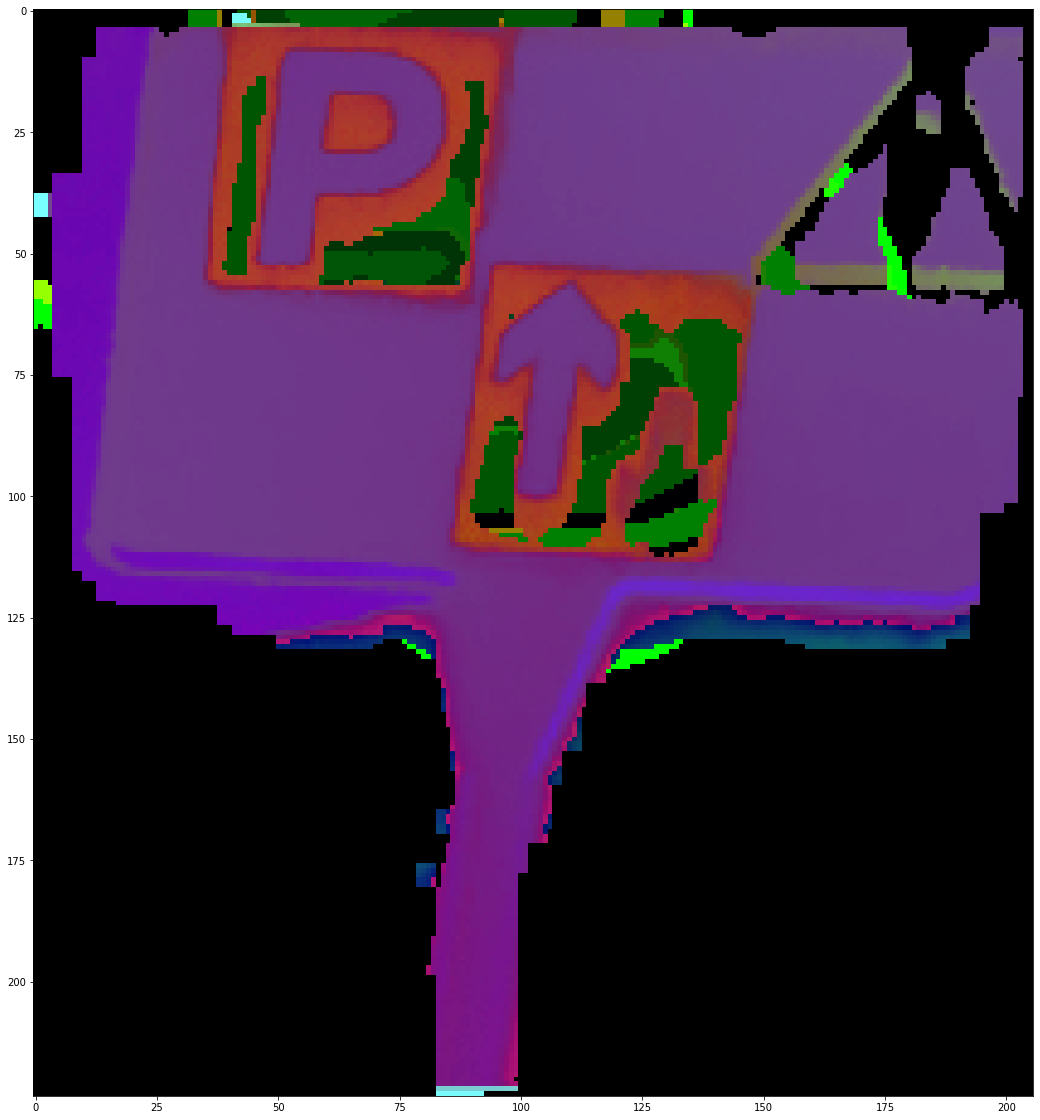

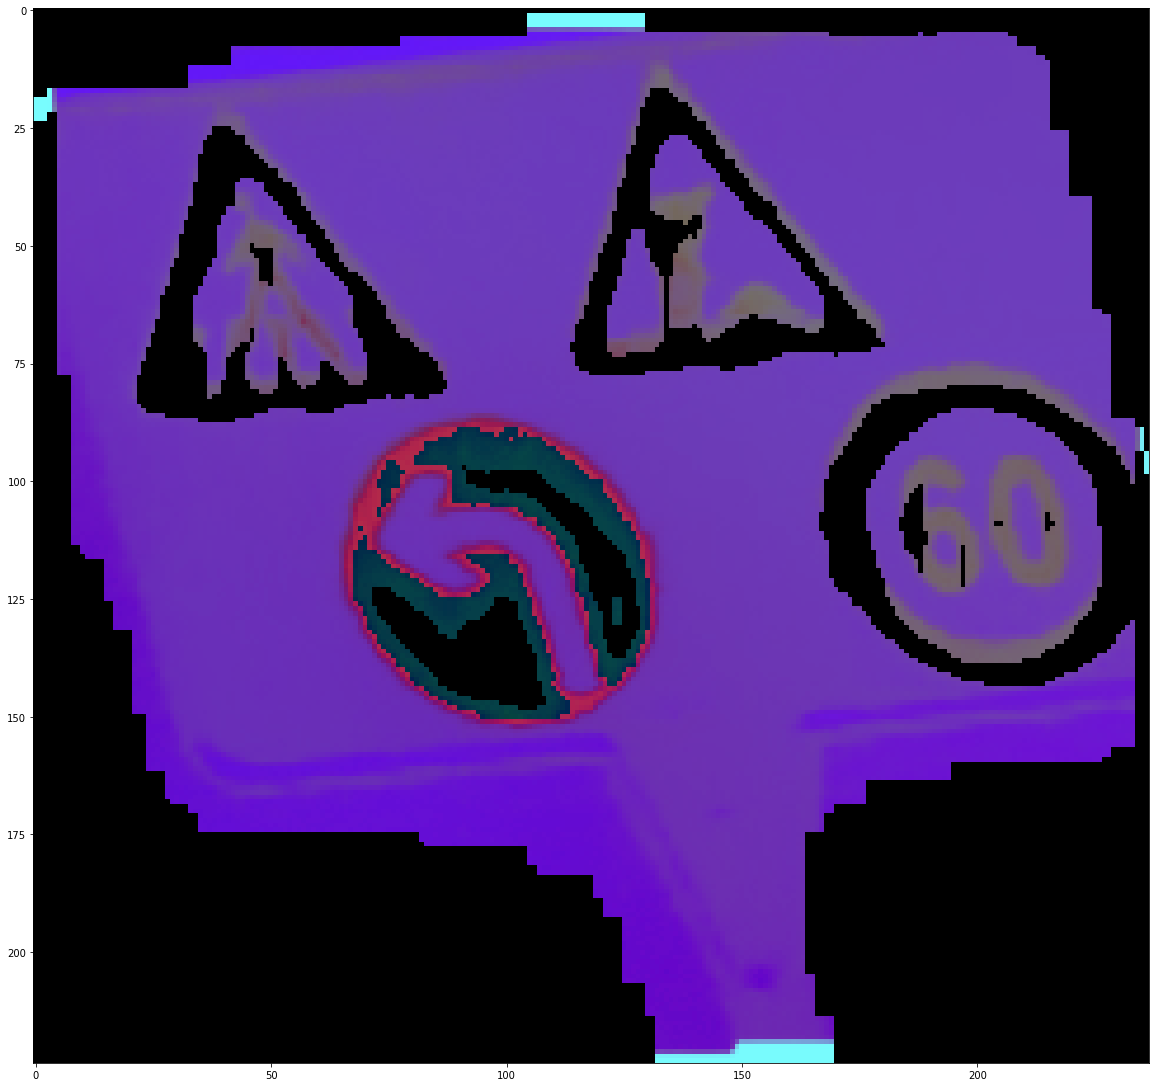

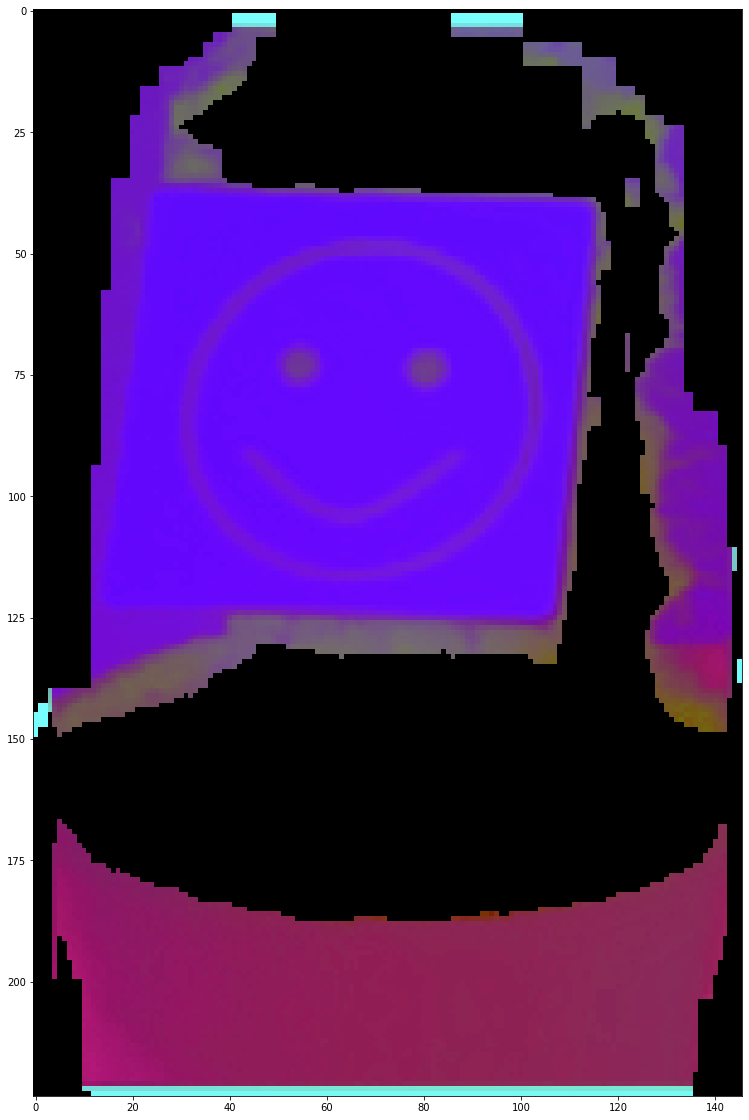

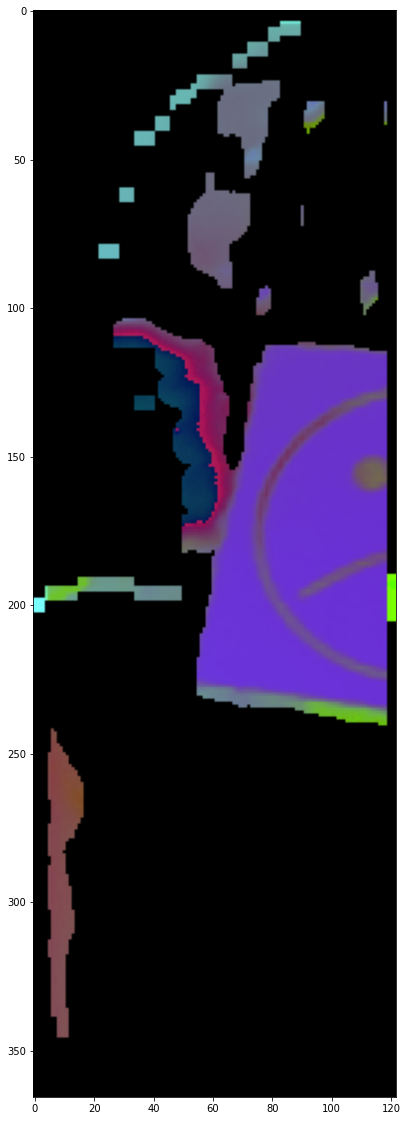

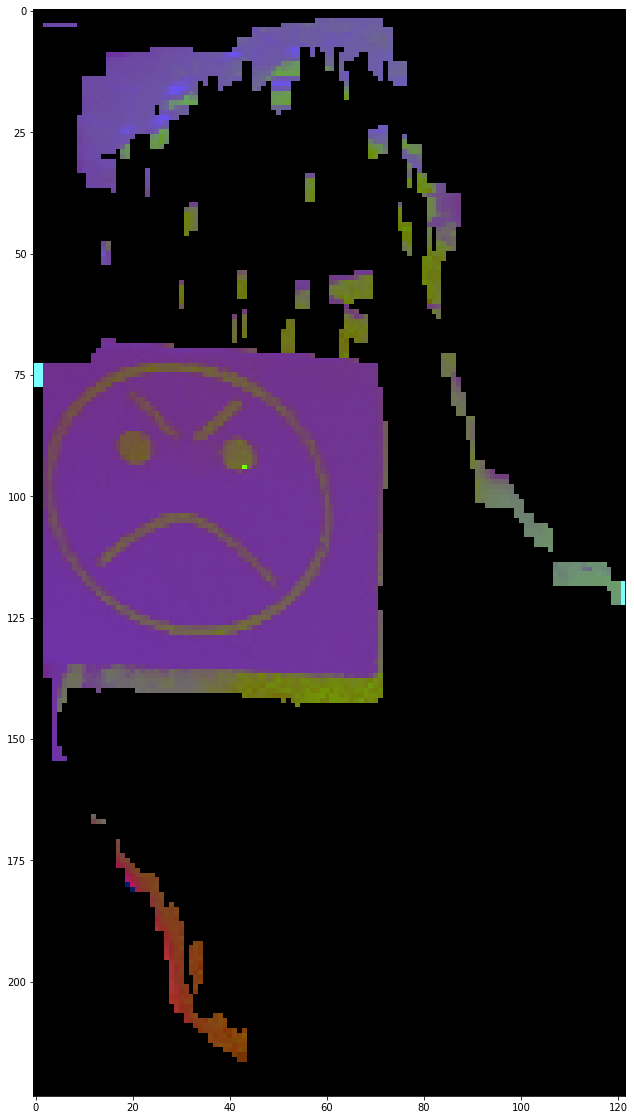

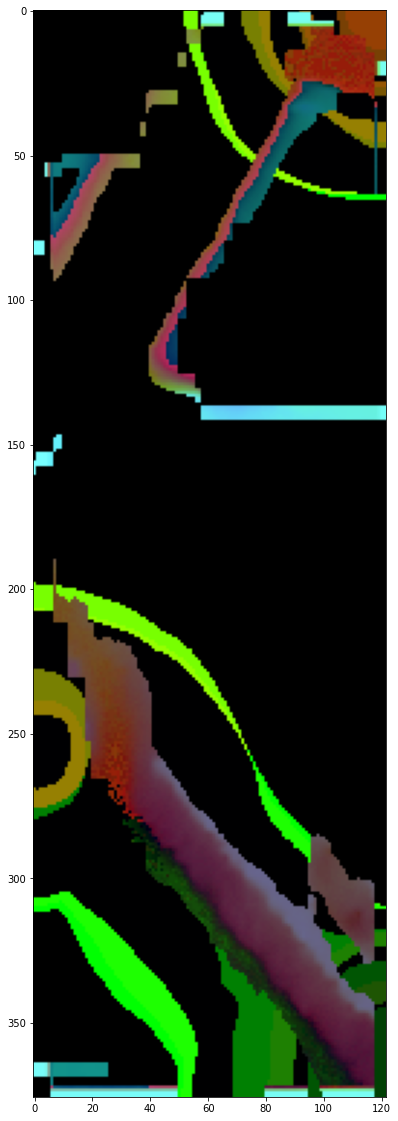

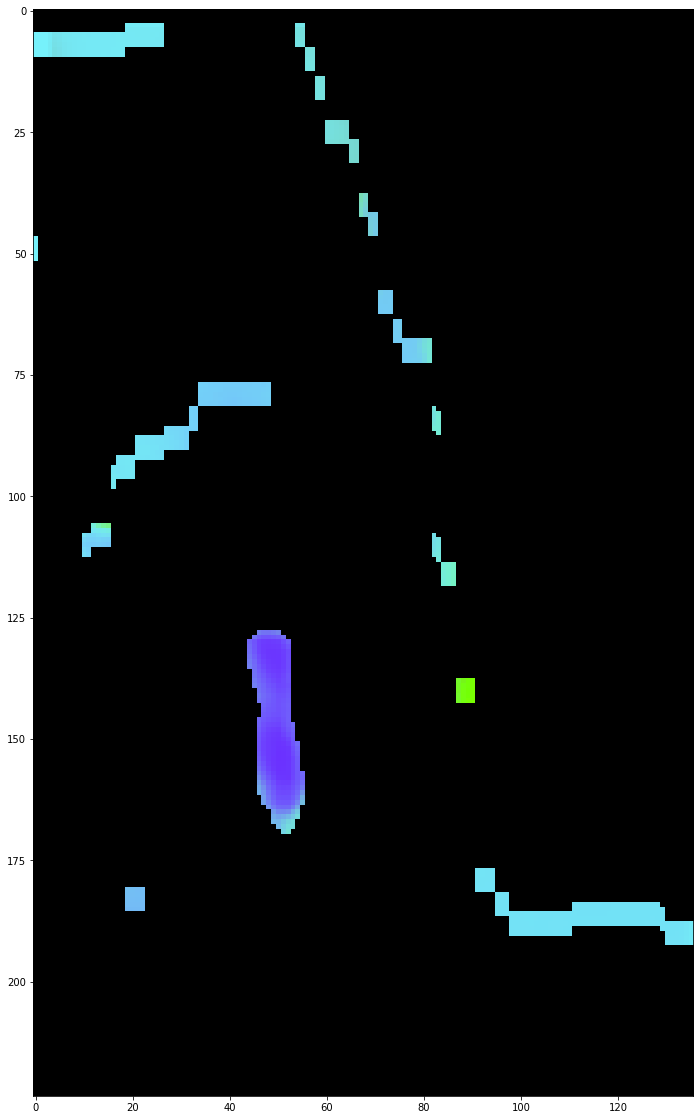

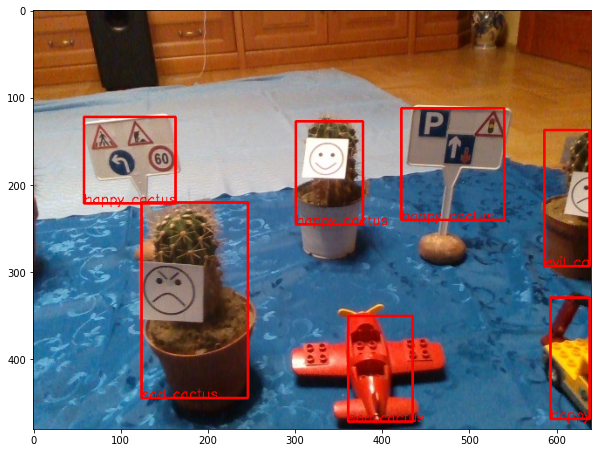

In [37]:
import imutils

#SEPARATE EYEANDSMILEDETECTION
#BEST WROKING VERSION YET

#params:
#   - image: the image to use
#   - isRGB: shows if the input is RGB
#   - parameterIndex: the index of the value in the imageStruct (in case of isRGB == True -> 0:R 1:G 2:B)
#   - fromValue: the start value of the measurement
#   - stepValue: the value of one step
#   - steps: determine the number of the steps
#   - offset: set an offset, it works like a preMasking (ex. ((0,0,0),(255,255,120))) (has no affect on the value you want to measure)

def findMax2(matches):
  maximum = np.sqrt(matches[0][0]**2+matches[0][1]**2)
  i = 0
  index = 0
  for i in range(len(matches)):
    if(np.sqrt(matches[i][0]**2+matches[i][1]**2) >= maximum):
      maximum = np.sqrt(matches[i][0]**2+matches[i][1]**2)
      index = i
  
  return index

def findMaxBoundingRects(boundingRects):
  maxX = boundingRects[0][2]
  maxY = boundingRects[0][3]
  i = 0
  index = 0
  for i in range(len(boundingRects)):
    if(boundingRects[i][2] > maxX or boundingRects[i][3] > maxY):
      maxX = boundingRects[i][2]
      maxY = boundingRects[i][3]
  
  return (maxX,maxY)

def createTemplate(filePathes):
  ths = []
  tws = []
  temptemplates = []
  templates = []
  for filepath in filePathes:
    template = cv2.imread(filepath)
    template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    template = cv2.Canny(template, 50, 250)
    temptemplates.append(template)
    tws.append(template.shape[1])
    ths.append(template.shape[0])
  #tW = min(tws)
  #tH = min(ths)
  #print(tW, tH)
  #for temp in temptemplates:
  #  tH2 = temp.shape[1]
  #  tW2 = temp.shape[0]
  #  yratio =  tH2 / tH
  #  xratio =  tW2 /tW
  #  final = min(yratio, xratio)
  #  temp = cv2.resize(temp, (int(tW2*final), int(tH2*final)))
  #  temp = cv2.Canny(temp, 50, 250)
  #  templates.append(temp)
  
  return temptemplates


 #objects[i] = cv2.cvtColor(objects[i], cv2.COLOR_RGB2HSV)
  maszk = cv2.cvtColor(masks[i],cv2.COLOR_BGR2GRAY)
  valamiH = cv2.cvtColor(objects[i],cv2.COLOR_BGR2HSV)[:,:,0]
  valamiH = cv2.bitwise_and(valamiH,valamiH,mask = maszk)
  valamiS = cv2.cvtColor(objects[i],cv2.COLOR_BGR2HSV)[:,:,1]
  valamiS = cv2.bitwise_and(valamiS,valamiS,mask = maszk)
  valamiV = cv2.cvtColor(objects[i],cv2.COLOR_BGR2HSV)[:,:,2]
  valamiV = cv2.bitwise_and(valamiV,valamiV,mask = maszk)
  ret, thresh = cv2.threshold(valamiS,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
  thresh = cv2.dilate(thresh, (3,3), thresh, iterations = 3 )
  plt.figure(figsize=(10,10))
  plt.subplot(1,3,1)
  plt.imshow(valamiH, cmap = 'gray')
  plt.subplot(1,3,2)
  plt.imshow(thresh, cmap = 'gray')
  plt.subplot(1,3,3)
  plt.imshow(valamiV, cmap = 'gray')
  print(np.average(valamiH), np.average(valamiS), np.average(valamiV))

def filterOutCacti(objects, masks, boundingRects):
  cacti = []
  objectplaces = []
  avgSs = []
  for i in range(len(objects)):
    #objects[i] = cv2.cvtColor(objects[i], cv2.COLOR_RGB2HSV)
    maszk = cv2.cvtColor(masks[i],cv2.COLOR_BGR2GRAY)
    #valamiH = cv2.cvtColor(objects[i],cv2.COLOR_BGR2HSV)[:,:,0]
    #valamiH = cv2.bitwise_and(valamiH,valamiH,mask = maszk)
    valamiS = cv2.cvtColor(objects[i],cv2.COLOR_BGR2HSV)
    valamiS = cv2.bitwise_and(valamiS,valamiS,mask = maszk)
    #plt.figure(figsize=(10,10))
    #plt.subplot(1,2,1)
    #plt.imshow(valamiH)
    #plt.subplot(1,2,2)
    #plt.imshow(valamiS)

    newmaszk = cv2.cvtColor(valamiS,cv2.COLOR_BGR2HSV)[:,:,1]
    valamiS = cv2.bitwise_and(valamiS,valamiS,mask = newmaszk)
    valamiS = cv2.cvtColor(valamiS,cv2.COLOR_HSV2BGR)

######newcode
    maszk2 = cv2.cvtColor(masks[i],cv2.COLOR_BGR2GRAY)
    valamiS2 = cv2.cvtColor(objects[i],cv2.COLOR_BGR2HSV)[:,:,1]
    valamiS2 = cv2.bitwise_and(valamiS2,valamiS2,mask = maszk)
    ret, thresh = cv2.threshold(valamiS2,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    thresh = cv2.dilate(thresh, (3,3), thresh, iterations = 5 )

    valamiS = cv2.bitwise_and(valamiS,valamiS,mask = thresh)

    cacti.append(valamiS)
    xlength = boundingRects[i][1]+boundingRects[i][3]
    ystart = boundingRects[i][0]
    objectplaces.append((ystart, xlength))

  return cacti, objectplaces

def getCactiSubClass2(ret, boundingRects, depth_out):
  #get the copped objects
  objects = []
  masks = []
  templates = []
  for i in range(len(boundingRects)):
    start = (int(boundingRects[i][0]),int(boundingRects[i][1])) #startX, startY
    end = (int(boundingRects[i][0]+boundingRects[i][2]) , int(boundingRects[i][1]+boundingRects[i][3])) #endX, endY
    img2 = ret[int(boundingRects[i][1]):int(boundingRects[i][1]+boundingRects[i][3]), int(boundingRects[i][0]):int(boundingRects[i][0]+boundingRects[i][2])]
    imgMask = depth_out[int(boundingRects[i][1]):int(boundingRects[i][1]+boundingRects[i][3]), int(boundingRects[i][0]):int(boundingRects[i][0]+boundingRects[i][2])]
    objects.append(img2)
    masks.append(imgMask)
  maxX, maxY = findMaxBoundingRects(boundingRects)
  #resize objects to same size
  for i in range(len(objects)):
    y = objects[i].shape[0]
    x = objects[i].shape[1]
    yratio = maxY / y
    xratio = maxX / x
    final = max(yratio, xratio)
    objects[i] = cv2.resize(objects[i], (int(x*final), int(y*final)))
    masks[i] = cv2.resize(masks[i], (int(x*final), int(y*final)))

  #create templates
  filePathes = ['/content/CVML_HW/eyebrowface.png','/content/CVML_HW/eyeface.png', '/content/CVML_HW/sadfaceface.png', '/content/CVML_HW/smileface.png' ]
  templates = createTemplate(filePathes)
  #templates.append(template)
  #template = createTemplate('/content/CVML_HW/eye.png')
  #templates.append(template)
  #template = createTemplate('/content/CVML_HW/sad.png')
  #templates.append(template)
  #template = createTemplate('/content/CVML_HW/smile.png')
  #templates.append(template)

  #for temp in templates:
  #  plt.figure(figsize=(10,10))
  #  plt.imshow(temp)

  tH = templates[0].shape[0]
  tW = templates[0].shape[1]
  objects, objectplaces = filterOutCacti(objects, masks, boundingRects)

  i = -1
  for obj in objects:
    i += 1
    matches = []
    realmatches = []
    text = "default text"
    if obj.shape[0] < 67 or  obj.shape[1] < 77:
      continue
    obj = cv2.bilateralFilter(obj, 100, 50, 50)
    gray = cv2.cvtColor(obj, cv2.COLOR_BGR2HSV)
    plt.figure(figsize=(20,20))
    plt.imshow(gray,cmap='gray') 
    for scale in np.linspace(0.2, 1.0, 30)[::-1]:
      resized = imutils.resize(gray, width = int(gray.shape[1] * scale))
      r = gray.shape[1] / float(resized.shape[1])
      if resized.shape[0] < tH or resized.shape[1] < tW:
        break
      v = np.median(resized)
      sigma = 0.33
      lower_tresh = int(max(0, (1.0-sigma)*v))
      upper_tresh = int(min(255, (1.0+sigma)*v))
      edged = cv2.Canny(resized, lower_tresh, upper_tresh)
      #plt.figure(figsize=(10,10))
      #plt.imshow(edged)
      result = cv2.matchTemplate(edged, templates[0], cv2.TM_CCORR_NORMED)
      r = 1 
      (_, maxVal0, _, maxLoc0) = cv2.minMaxLoc(result)
      match = (maxVal0, maxLoc0, r, 0)
      matches.append(match)
      #plt.figure(figsize=(10,10))
      #plt.imshow(obj)
      #print(i)
      #print("happy")
      #print(maxVal0)
      result = cv2.matchTemplate(edged, templates[1], cv2.TM_CCORR_NORMED)
      (_, maxVal1, _, maxLoc1) = cv2.minMaxLoc(result)
      match = (maxVal1, maxLoc1, r, 1)
      matches.append(match)
      #print("sad")
      #print(maxVal1)

      if maxVal0 > maxVal1 : #has eyebrow
        result = cv2.matchTemplate(edged, templates[2], cv2.TM_CCORR_NORMED)
        (_, maxVal2, _, maxLoc2) = cv2.minMaxLoc(result)
        match = (maxVal2, maxLoc2, r, 2)
        matches.append(match)
        #print("angry")
        #print(maxVal2)
        result = cv2.matchTemplate(edged, templates[3], cv2.TM_CCORR_NORMED)
        (_, maxVal3, _, maxLoc3) = cv2.minMaxLoc(result)
        match = (maxVal3, maxLoc3, r, 3)
        matches.append(match)
        #print("evil")
        #print(maxVal3)

        if maxVal2 > maxVal3: #sad
          text = "angry cacti"
          realmatches.append((maxVal0, maxVal2, "angry cactus"))
        else: #smile
          text = "evil cacti"
          realmatches.append((maxVal0, maxVal3, "evil cactus"))

      else: #does not have eyebrow
        result = cv2.matchTemplate(edged, templates[2], cv2.TM_CCORR_NORMED)
        (_, maxVal2, _, maxLoc2) = cv2.minMaxLoc(result)
        match = (maxVal2, maxLoc2, r, 2)
        matches.append(match)
        #print("angry")
        #print(maxVal2)
        result = cv2.matchTemplate(edged, templates[3], cv2.TM_CCORR_NORMED)
        (_, maxVal3, _, maxLoc3) = cv2.minMaxLoc(result)
        match = (maxVal3, maxLoc3, r, 3)
        matches.append(match)
        #print("evil")
        #print(maxVal3)

        if maxVal2 > maxVal3: #sad
          text = "sad cacti"
          realmatches.append((maxVal1, maxVal2, "sad cactus"))
        else: #smile
          text = "happy cacti"
          realmatches.append((maxVal1, maxVal3, "happy cactus"))

    if matches == []:
      continue

    index = findMax2(realmatches)
    _,_,text = realmatches[index]
    #if(matches[index][0] <= 0.15):
    #  continue
    #print(i)
    #print(matches[index][0])
    #plt.figure(figsize=(10,10))
    #plt.imshow(templates[ind])
    #print(xstart,xlength, ystart, ylength)
    #ret = cv2.putText(ret, text, (objectplaces[i]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1, cv2.LINE_4)
    ret = cv2.putText(ret, text, ( boundingRects[i][0],boundingRects[i][1]+boundingRects[i][3] ), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1, cv2.LINE_4)
  boundingRects
  return ret


imgBe = cv2.imread("../HW/g2/rgb/147.jpg")
depthBe = cv2.imread("../HW/g2/depth/147.png", -1)
ret, boundingRects, depth_out = depth_segmenter(imgBe, depthBe, debug=False)
plt.figure(figsize=(20,20))
plt.imshow(ret,cmap='gray')
finalImg = getCactiSubClass2(ret, boundingRects, depth_out)
plt.figure(figsize=(10,10))
plt.imshow(finalImg)

In [0]:
H
import glob
i=0
for file in glob.glob("../HW/g1/rgb/*.*"):
  i=i+1
  imgBGR = cv2.imread(file)
  asd = file.split("/rgb/")
  asd.append(asd[1].split(".jpg"))

  depfile = cv2.imread(asd[0]+"/depth/"+asd[2][0]+".png",-1)
  retRGB, bounding, depth_out = depth_segmenter(imgBGR,depfile,False)
  final = getCactiSubClass2(retRGB, bounding, depth_out)
  plt.figure(figsize=(10,10))
  plt.imshow(final,cmap='gray')
  cv2.imwrite(("../HW/out/g4/"+str(i)+".jpg"),cv2.cvtColor(retRGB, cv2.COLOR_RGB2BGR))